*dataset overview:*

The dataset contains details about electric vehicles (EVs) and plug-in hybrid electric vehicles (PHEVs) registered across various U.S. counties. Key variables include geographic information (county, city, state, postal code) and vehicle details such as VIN (Vehicle Identification Number), Model Year, Make, and Model. It also includes the Electric Vehicle Type (BEV or PHEV), CAFV Eligibility (whether the vehicle qualifies for clean fuel incentives), and Electric Range (miles the vehicle can travel on electric power). Additional features include the Base MSRP, Legislative District, Vehicle Location (coordinates), and associated Electric Utility. This dataset is useful for analyzing trends in EV adoption, vehicle performance, and geographic distribution.

TASK1:Apply Exploratory Data Analysis (Univariate and Bivariate) on the dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [3]:
#load the dataset
data=pd.read_csv("C:/Users/dipak/Desktop/data science and gen ai/EDA EV/dataset.csv")
data.head()

VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   
3           Clean Alternative Fuel Vehicle Eligible             238   
4             Not eligible due to low battery range              26   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                   NaN       198968248   
1          0                   NaN         5204412   
2          0                  15.0       218972519   
3          0                  39.0       186750406   
4          0                  38.0         2006714   

              Vehicle Location        Electric Utility  2020 Census Tract  
0    POINT (-81.80023 24.5545)                     NaN        12087972100  
1  POINT (-114.57245 35.16815)                     NaN        32003005702  
2  POINT (-120.50721 46.60448)              PACIFICORP        53077001602  
3   POINT (-121.7515 48.53892)  PUGET SOUND ENERGY INC        53057951101  
4  POINT (-122.20596 47.97659)  PUGET SOUND ENERGY INC        53061041500

In [4]:

data.shape

(112634, 17)

In [5]:
data.rename(columns={'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'CAFV Eligibility'}, inplace=True)

In [6]:
data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type', 'CAFV Eligibility',
       'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VIN (1-10)             112634 non-null  object 
 1   County                 112634 non-null  object 
 2   City                   112634 non-null  object 
 3   State                  112634 non-null  object 
 4   Postal Code            112634 non-null  int64  
 5   Model Year             112634 non-null  int64  
 6   Make                   112634 non-null  object 
 7   Model                  112614 non-null  object 
 8   Electric Vehicle Type  112634 non-null  object 
 9   CAFV Eligibility       112634 non-null  object 
 10  Electric Range         112634 non-null  int64  
 11  Base MSRP              112634 non-null  int64  
 12  Legislative District   112348 non-null  float64
 13  DOL Vehicle ID         112634 non-null  int64  
 14  Vehicle Location       112610 non-nu

In [8]:
data.describe()

Postal Code     Model Year  Electric Range      Base MSRP  \
count  112634.000000  112634.000000   112634.000000  112634.000000   
mean    98156.226850    2019.003365       87.812987    1793.439681   
std      2648.733064       2.892364      102.334216   10783.753486   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2017.000000        0.000000       0.000000   
50%     98119.000000    2020.000000       32.000000       0.000000   
75%     98370.000000    2022.000000      208.000000       0.000000   
max     99701.000000    2023.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         112348.000000    1.126340e+05       1.126340e+05  
mean              29.805604    1.994567e+08       5.296650e+10  
std               14.700545    9.398427e+07       1.699104e+09  
min                1.000000    4.777000e+03       1.101001e+09  
25%               18.000000    1.484142e+08       5.303301e+10  
50%               34.000000    1.923896e+08       5.303303e+10  
75%               43.000000    2.191899e+08       5.305307e+10  
max               49.000000    4.792548e+08       5.603300e+10

In [9]:
def num_uni_anl(d):
  for column in d:
    print("*"*5,column,"*"*5)
    print("min :",data[column].min())
    print("max :",data[column].max())
    print("mean:",data[column].mean())
    print("median:",data[column].median())
    print("mode:",data[column].mode())
    print("skew ness :",data[column].skew())
    print("kurtosis:",data[column].kurt())
    print("-------------------------------------------------------------")
num_uni_anl(data[["Electric Range","Base MSRP"]])

***** Electric Range *****
min : 0
max : 337
mean: 87.81298719747146
median: 32.0
mode: 0    0
Name: Electric Range, dtype: int64
skew ness : 0.8171032263518314
kurtosis: -0.8763121486857495
-------------------------------------------------------------
***** Base MSRP *****
min : 0
max : 845000
mean: 1793.4396807358346
median: 0.0
mode: 0    0
Name: Base MSRP, dtype: int64
skew ness : 10.100497243522174
kurtosis: 371.69568212753495
-------------------------------------------------------------


In [10]:
#finding null values
data.isnull().sum()

VIN (1-10)                 0
County                     0
City                       0
State                      0
Postal Code                0
Model Year                 0
Make                       0
Model                     20
Electric Vehicle Type      0
CAFV Eligibility           0
Electric Range             0
Base MSRP                  0
Legislative District     286
DOL Vehicle ID             0
Vehicle Location          24
Electric Utility         443
2020 Census Tract          0
dtype: int64

In [11]:
#handling the missing values
data["Model"].fillna("unknown",)
#because it is numerical 
data["Legislative District"].fillna(data["Legislative District"].mode()[0])
data["Vehicle Location"].fillna("unknown",)
data["Electric Utility"].fillna("unknown")
data.isnull().sum()

VIN (1-10)                 0
County                     0
City                       0
State                      0
Postal Code                0
Model Year                 0
Make                       0
Model                     20
Electric Vehicle Type      0
CAFV Eligibility           0
Electric Range             0
Base MSRP                  0
Legislative District     286
DOL Vehicle ID             0
Vehicle Location          24
Electric Utility         443
2020 Census Tract          0
dtype: int64

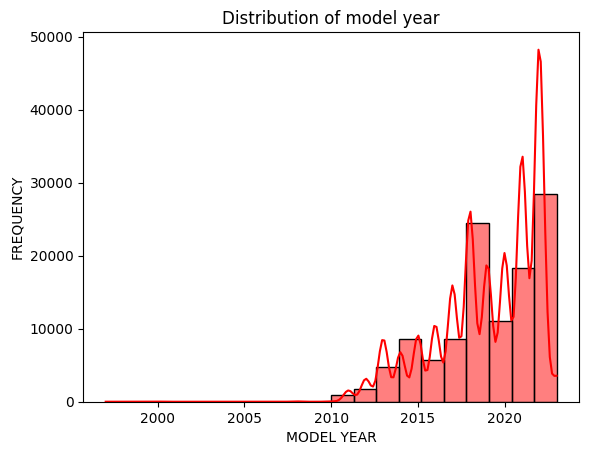

In [12]:
#UNIVARIATE ANALYSIS
sns.histplot(data["Model Year"],kde=True,bins=20,color="r")
plt.title("Distribution of model year")
plt.xlabel("MODEL YEAR")
plt.ylabel("FREQUENCY")
plt.show()

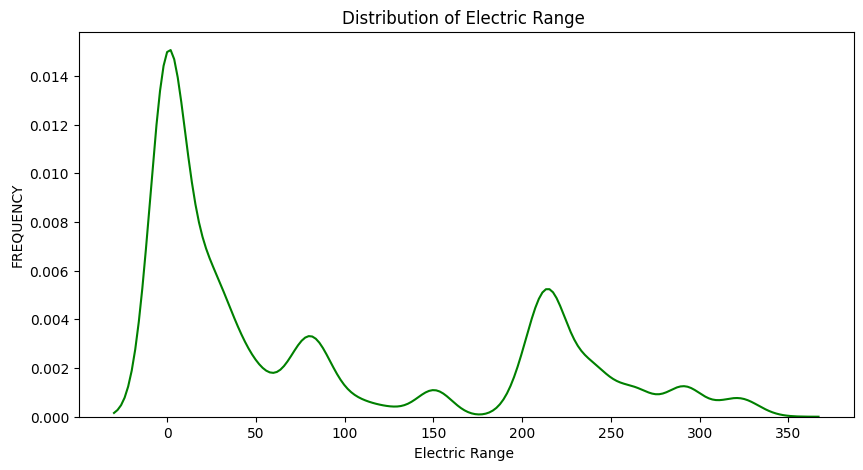

In [13]:
plt.figure(figsize=(10,5))
sns.kdeplot(data["Electric Range"],color="g")
plt.title("Distribution of Electric Range ")
plt.xlabel("Electric Range ")
plt.ylabel("FREQUENCY")
plt.show()

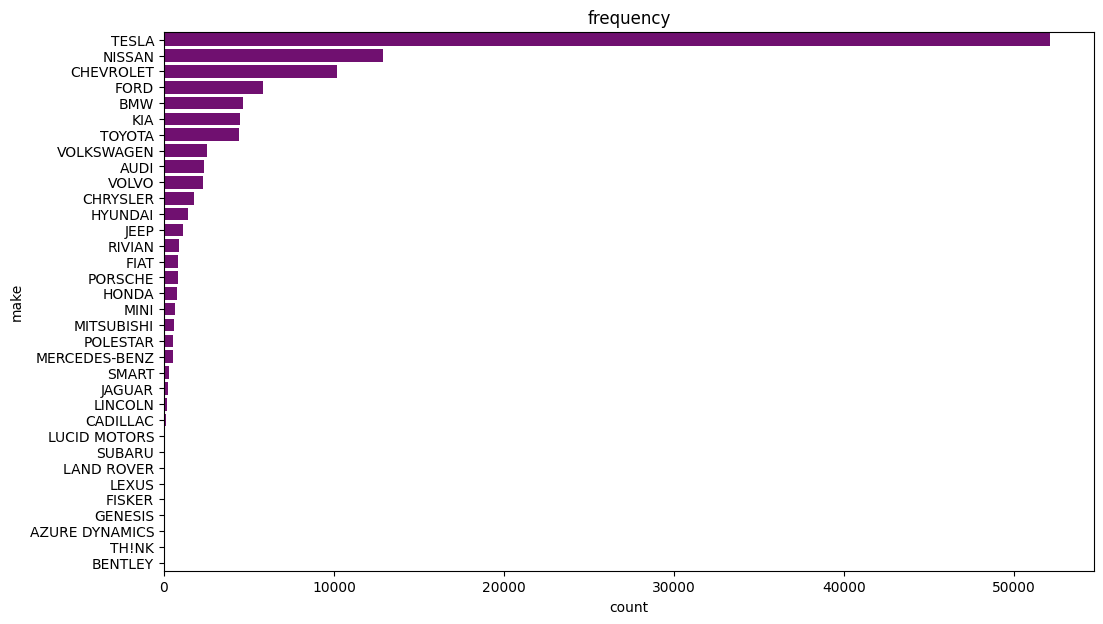

In [14]:
plt.figure(figsize=(12,7))
make_counts =data["Make"].value_counts()
sns.barplot(y=make_counts.index ,x= make_counts.values,color="purple")
plt.xlabel("count")
plt.ylabel("make")
plt.title("frequency")
plt.show()

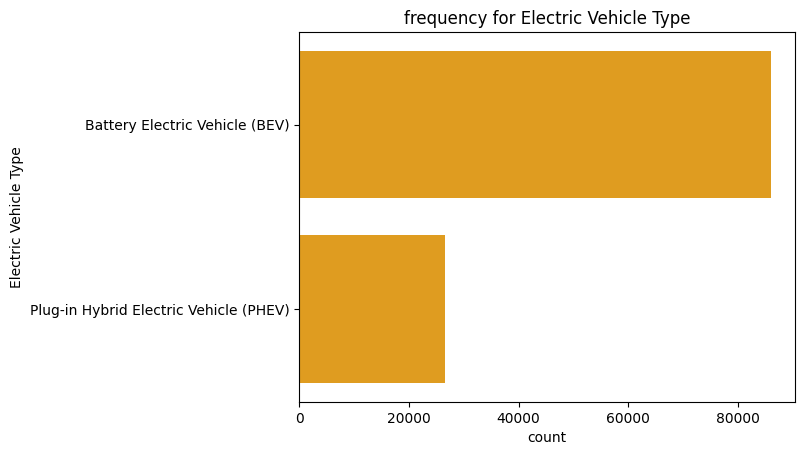

In [15]:
typec=data["Electric Vehicle Type"].value_counts()
sns.barplot(y=typec.index,x=typec.values,color="orange",orient="horizontal")
plt.title("frequency for Electric Vehicle Type")
plt.ylabel("Electric Vehicle Type")
plt.xlabel("count")
plt.show()

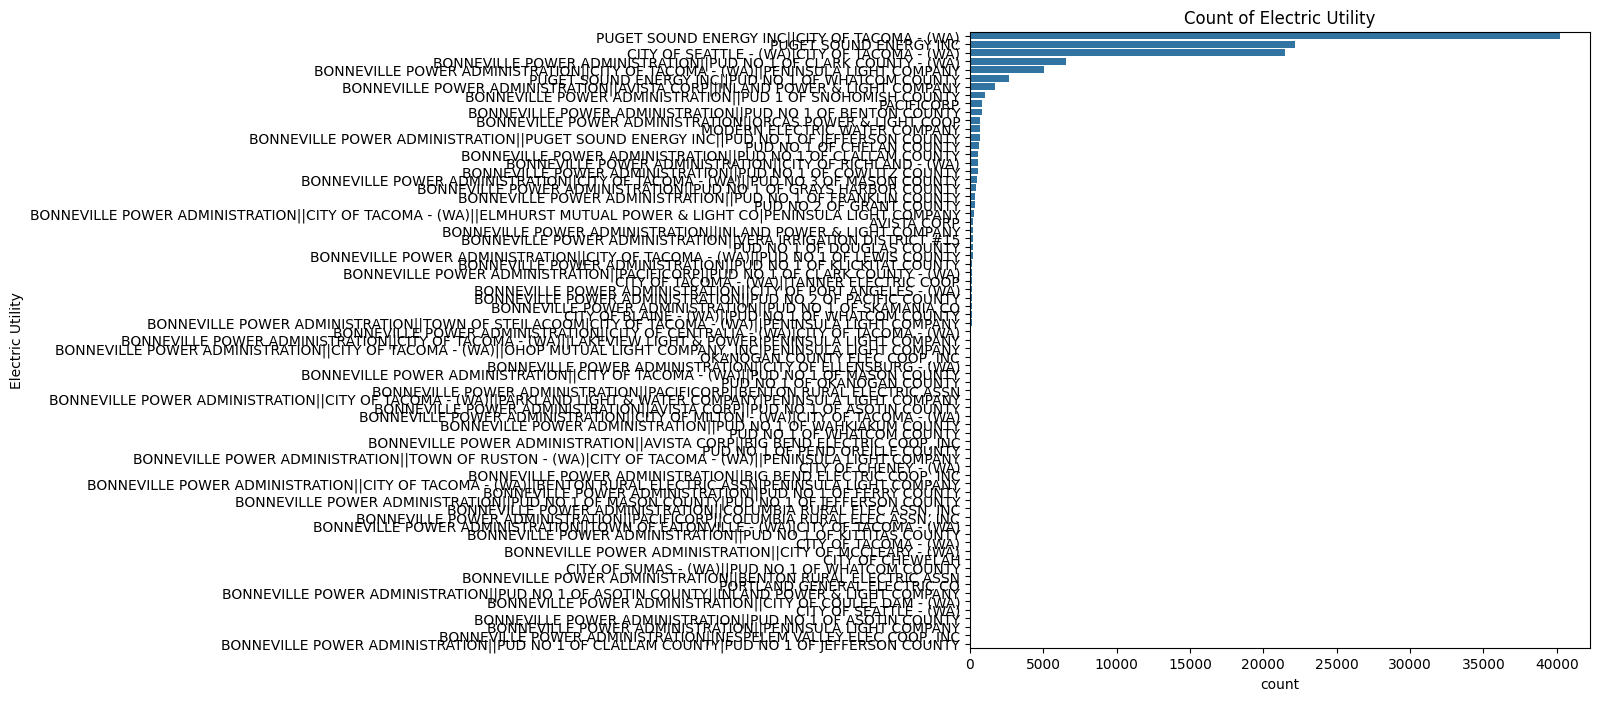

In [16]:
cat_cols = ['Electric Utility'] 
for col in cat_cols:
    plt.figure(figsize=(8, 8))
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.show()

bivariate analysis

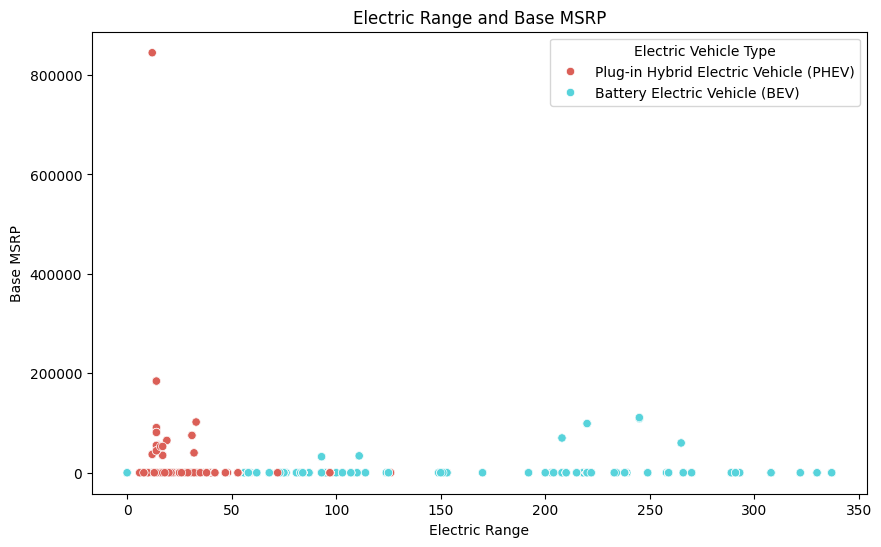

In [17]:
#biVARIATE ANALYSIS
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x="Electric Range",y="Base MSRP",hue="Electric Vehicle Type",palette="hls")
plt.title("Electric Range and Base MSRP")
plt.xlabel("Electric Range")
plt.ylabel("Base MSRP")
plt.show()


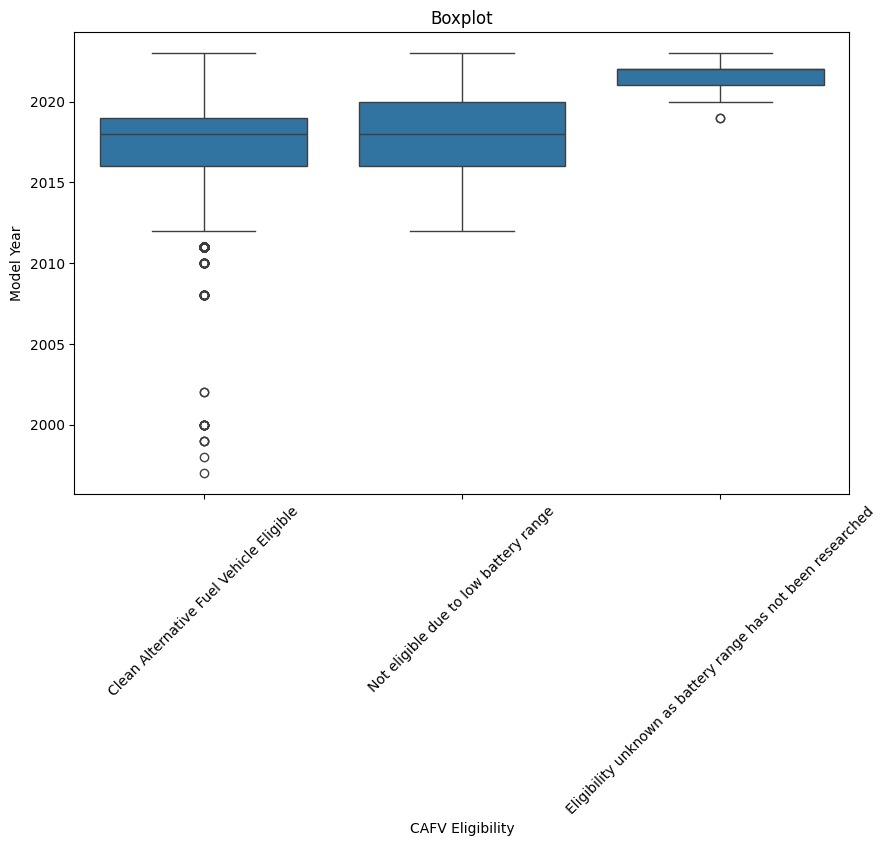

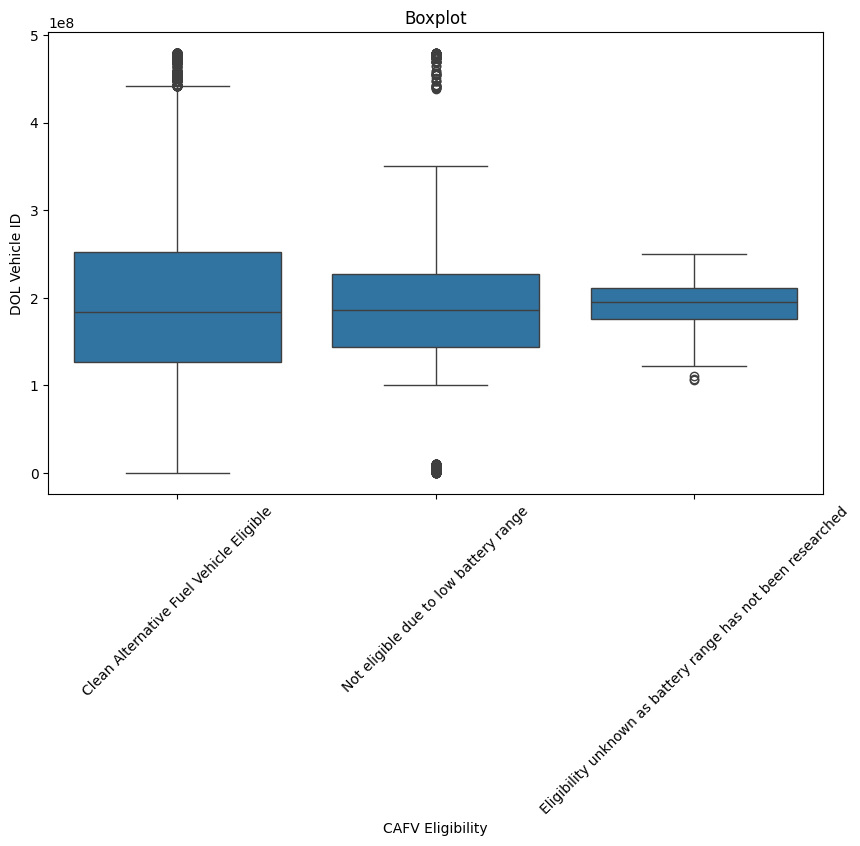

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CAFV Eligibility', y='Model Year', data=data)
plt.xticks(rotation=45)
plt.title(f'Boxplot')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='CAFV Eligibility', y='DOL Vehicle ID', data=data)
plt.xticks(rotation=45)
plt.title(f'Boxplot')
plt.show()

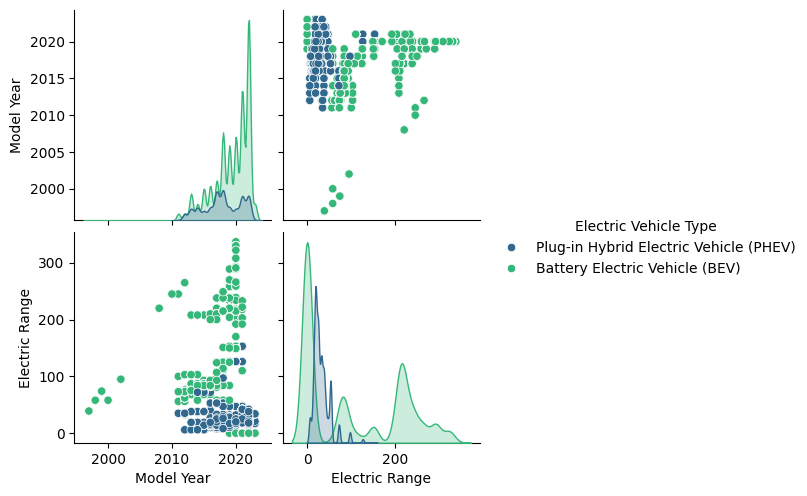

In [19]:
sns.pairplot(data,vars=["Model Year","Electric Range"],hue="Electric Vehicle Type",palette="viridis")
plt.show()

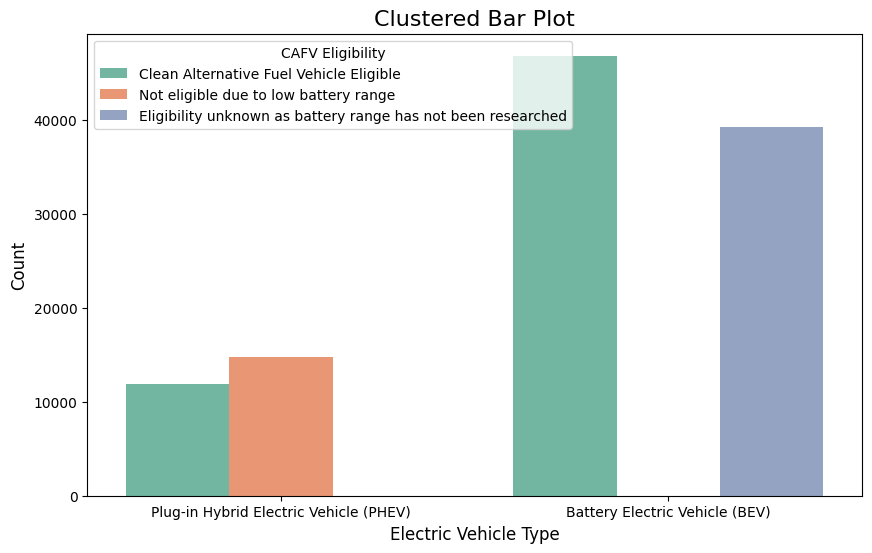

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Electric Vehicle Type', hue='CAFV Eligibility', data=data, palette='Set2')

plt.title('Clustered Bar Plot', fontsize=16)
plt.xlabel('Electric Vehicle Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

TASK 2: Create a Choropleth using plotly.express to display the number of EV vehicles based on location.


In [21]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import plotly.express as px
ev_counts=data["State"].value_counts().reset_index()
ev_counts.columns=["State","EV_Count"]


fig= px.choropleth(ev_counts,
                   locations="State",
                   locationmode="USA-states",
                   color="EV_Count",
                   scope="usa",
                   title="no.of EV according to state in usa")

fig.show()


**TASK 3:Create a Racing Bar Plot to display the animation of EV Make and its count each year.**

In [23]:
pip install bar-chart-race

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
year_ev_count = data.groupby(['Make', 'Model Year']).size().reset_index(name="Electric Vehicle Count")
year_ev_count

Make  Model Year  Electric Vehicle Count
0     AUDI        2016                     214
1     AUDI        2017                     187
2     AUDI        2018                     174
3     AUDI        2019                     392
4     AUDI        2020                     224
..     ...         ...                     ...
204  VOLVO        2019                     190
205  VOLVO        2020                     162
206  VOLVO        2021                     580
207  VOLVO        2022                     882
208  VOLVO        2023                      21

[209 rows x 3 columns]

In [25]:
year_ev_count['Make'].unique()
flag =data.groupby(["Model Year","Make"])["Model Year"].count().unstack()
for col_n in year_ev_count['Make'].unique():
    print("-"*20, col_n, "-"*20)
    print(f"{col_n}:{data[data['Make']==col_n].shape}")

-------------------- AUDI --------------------
AUDI:(2332, 17)
-------------------- AZURE DYNAMICS --------------------
AZURE DYNAMICS:(7, 17)
-------------------- BENTLEY --------------------
BENTLEY:(3, 17)
-------------------- BMW --------------------
BMW:(4680, 17)
-------------------- CADILLAC --------------------
CADILLAC:(108, 17)
-------------------- CHEVROLET --------------------
CHEVROLET:(10182, 17)
-------------------- CHRYSLER --------------------
CHRYSLER:(1794, 17)
-------------------- FIAT --------------------
FIAT:(822, 17)
-------------------- FISKER --------------------
FISKER:(20, 17)
-------------------- FORD --------------------
FORD:(5819, 17)
-------------------- GENESIS --------------------
GENESIS:(18, 17)
-------------------- HONDA --------------------
HONDA:(792, 17)
-------------------- HYUNDAI --------------------
HYUNDAI:(1412, 17)
-------------------- JAGUAR --------------------
JAGUAR:(219, 17)
-------------------- JEEP --------------------
JEEP:(1152, 

In [26]:
df_flag = year_ev_count.pivot_table(index='Model Year', columns='Make', values='Electric Vehicle Count', fill_value=0)
df_flag

Make         AUDI  AZURE DYNAMICS  BENTLEY    BMW  CADILLAC  CHEVROLET  \
Model Year                                                               
1997          0.0             0.0      0.0    0.0       0.0        1.0   
1998          0.0             0.0      0.0    0.0       0.0        0.0   
1999          0.0             0.0      0.0    0.0       0.0        0.0   
2000          0.0             0.0      0.0    0.0       0.0        0.0   
2002          0.0             0.0      0.0    0.0       0.0        0.0   
2008          0.0             0.0      0.0    0.0       0.0        0.0   
2010          0.0             0.0      0.0    0.0       0.0        0.0   
2011          0.0             4.0      0.0    0.0       0.0       71.0   
2012          0.0             3.0      0.0    0.0       0.0      496.0   
2013          0.0             0.0      0.0    0.0       0.0      818.0   
2014          0.0             0.0      0.0  457.0      58.0      724.0   
2015          0.0             0.0      0.0  403.0       0.0      467.0   
2016        214.0             0.0      0.0  383.0      18.0      309.0   
2017        187.0             0.0      0.0  692.0      15.0     2744.0   
2018        174.0             0.0      0.0  710.0      17.0     1126.0   
2019        392.0             0.0      0.0  279.0       0.0      966.0   
2020        224.0             0.0      1.0  143.0       0.0     1014.0   
2021        544.0             0.0      1.0  635.0       0.0      377.0   
2022        585.0             0.0      1.0  905.0       0.0      892.0   
2023         12.0             0.0      0.0   73.0       0.0      177.0   

Make        CHRYSLER   FIAT  FISKER    FORD  ...  POLESTAR  PORSCHE  RIVIAN  \
Model Year                                   ...                              
1997             0.0    0.0     0.0     0.0  ...       0.0      0.0     0.0   
1998             0.0    0.0     0.0     1.0  ...       0.0      0.0     0.0   
1999             0.0    0.0     0.0     3.0  ...       0.0      0.0     0.0   
2000             0.0    0.0     0.0    10.0  ...       0.0      0.0     0.0   
2002             0.0    0.0     0.0     0.0  ...       0.0      0.0     0.0   
2008             0.0    0.0     0.0     0.0  ...       0.0      0.0     0.0   
2010             0.0    0.0     0.0     0.0  ...       0.0      0.0     0.0   
2011             0.0    0.0     0.0     0.0  ...       0.0      0.0     0.0   
2012             0.0    0.0    20.0    15.0  ...       0.0      0.0     0.0   
2013             0.0  106.0     0.0   662.0  ...       0.0      0.0     0.0   
2014             0.0   97.0     0.0   628.0  ...       0.0      8.0     0.0   
2015             0.0  242.0     0.0   556.0  ...       0.0     33.0     0.0   
2016             0.0  148.0     0.0   778.0  ...       0.0     78.0     0.0   
2017            94.0  167.0     0.0   659.0  ...       0.0     71.0     0.0   
2018           554.0   53.0     0.0   170.0  ...       0.0     78.0     0.0   
2019           119.0    9.0     0.0   136.0  ...       0.0     62.0     0.0   
2020           286.0    0.0     0.0    65.0  ...       0.0    143.0     0.0   
2021           504.0    0.0     0.0   882.0  ...      98.0    145.0     0.0   
2022           237.0    0.0     0.0  1250.0  ...     372.0    200.0   885.0   
2023             0.0    0.0     0.0     4.0  ...      88.0      0.0     0.0   

Make        SMART  SUBARU    TESLA  TH!NK  TOYOTA  VOLKSWAGEN  VOLVO  
Model Year                                                            
1997          0.0     0.0      0.0    0.0     0.0         0.0    0.0  
1998          0.0     0.0      0.0    0.0     0.0         0.0    0.0  
1999          0.0     0.0      0.0    0.0     0.0         0.0    0.0  
2000          0.0     0.0      0.0    0.0     0.0         0.0    0.0  
2002          0.0     0.0      0.0    0.0     2.0         0.0    0.0  
2008          0.0     0.0     23.0    0.0     0.0         0.0    0.0  
2010          0.0     0.0     24.0    0.0     0.0         0.0   

In [27]:
pip install python-ffmpeg


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import bar_chart_race as bcr
bcr.bar_chart_race(df_flag,
                  
                    n_bars=10,
                   
                    steps_per_period=45,
                    period_length=3000,

                  
                   figsize=(7,4),
                    dpi= 120,
                   title = 'electric vehicle make count over years',

                   # adjust the position and style of the period label
                    period_label={'x': .95, 'y': .1,
                    'ha': 'right',
                    'va': 'center',
                    'size': 15,
                    'weight': 'semibold'
                    },

                  
                    bar_label_size=10,

                  
                    tick_label_size=10,

                   
                    bar_kwargs={'alpha': .99, 'lw': 0},

                   period_fmt='{x:.0f}')

C:\Users\dipak\AppData\Local\Programs\Python\Python312\Lib\site-packages\bar_chart_race\_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\dipak\AppData\Local\Programs\Python\Python312\Lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\dipak\AppData\Local\Programs\Python\Python312\Lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\dipak\AppData\Local\Programs\Python\Python312\Lib\site-packages\bar_chart_race\_make_chart.py:226: UserWarning:

Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`

